In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
from utils.aux_funcs import flatten_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.population import Population

In [2]:
savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/'

In [3]:
pop = Population(savepath)

In [4]:
pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_population_update_120621.pickle


In [49]:
unit = pop.data.iloc[591] # 591; 281

<ErrorbarContainer object of 3 artists>

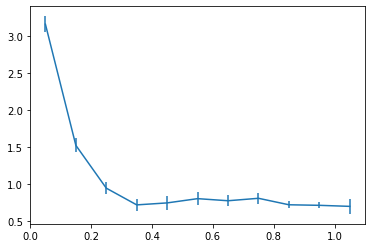

In [50]:
plt.errorbar(unit['hf1_wn_crf_cent'], unit['hf1_wn_crf_tuning'], yerr=unit['hf1_wn_crf_err'])

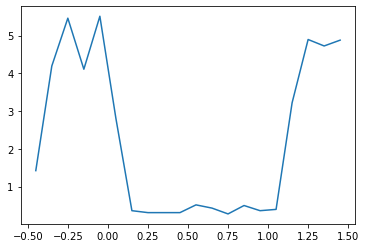

In [51]:
lower = -0.5; upper = 1.5; dt = 0.1
bins = np.arange(lower,upper+dt,dt)
psth = unit['hf3_gratings_grating_psth']
plt.plot(bins[0:-1]+ dt/2,psth)

In [8]:
np.shape(unit['hf1_wn_crf_tuning'])

(11,)

In [20]:
for ind, row in pop.data.iterrows():
    pop.data.at[ind, 'high_contrast_std'] = np.std(row['hf1_wn_crf_tuning'][3:])
    min_contrast = row['hf1_wn_crf_tuning'][0]
    mid_contrast = row['hf1_wn_crf_tuning'][3]
    max_contrast = row['hf1_wn_crf_tuning'][-1]
    pop.data.at[ind, 'SbC_min_mid_mod'] = (min_contrast - mid_contrast) / (min_contrast + mid_contrast)
    pop.data.at[ind, 'SbC_min_max_mod'] = (min_contrast - max_contrast) / (min_contrast + max_contrast)

In [21]:
unit = pop.data.iloc[591]

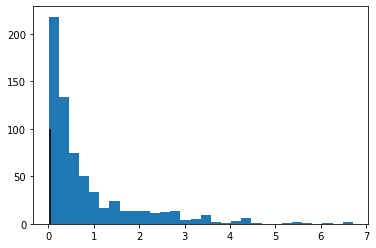

In [22]:
plt.hist(pop.data['high_contrast_std'], bins=30)
plt.vlines(unit['high_contrast_std'], 0,100, color='k')

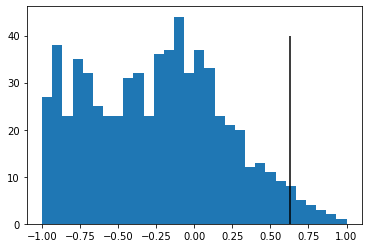

In [24]:
plt.hist(pop.data['SbC_min_mid_mod'], bins=30)
plt.vlines(unit['SbC_min_mid_mod'], 0,40, color='k')

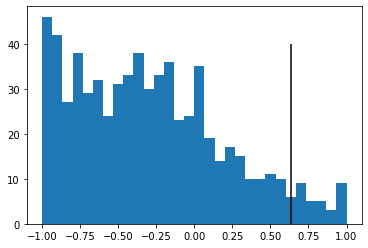

In [25]:
plt.hist(pop.data['SbC_min_max_mod'], bins=30)
plt.vlines(unit['SbC_min_max_mod'], 0,40, color='k')

In [ ]:
plt.hist(pop.data['SbC_min_max_mod'], bins=30)
plt.vlines(unit['SbC_min_max_mod'] - unit['SbC_min_mid_mod'], 0,40, color='k')

In [35]:
possible_SbCs = [24, 30, 31, 32, 33, 37, 61, 68, 69, 88, 89, 91, 93, 104, 106, 123, 124, 126, 130, 137, 141, 142, 146, 147, 152, 155, 156, 158, 161, 162, 169, 170, 180, 184, 203, 226, 238, 265, 279, 280, 282, 296, 297, 308, 323, 329, 343, 346, 350, 358, 360, 363, 367, 393, 401, 419, 422, 438, 445, 449, 451, 453, 461, 481, 490, 503, 507, 516, 531, 540, 556, 558, 572, 590, 592, 612, 624, 636, 648, 660, 661]
possible_SbCs = np.array([i-1 for i in possible_SbCs])

Text(0.5, 0, 'std(high contrast values)')

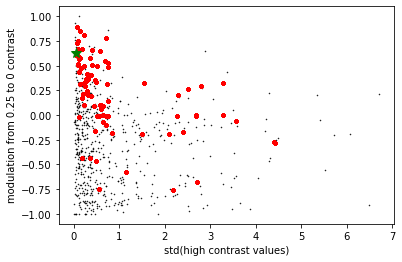

In [54]:
plt.plot(pop.data['high_contrast_std'], pop.data['SbC_min_mid_mod'], 'k.', markersize=1)
for ind in possible_SbCs:
    plt.plot(pop.data['high_contrast_std'].iloc[possible_SbCs], pop.data['SbC_min_mid_mod'].iloc[possible_SbCs], 'ro', markersize=3)
plt.plot(unit['high_contrast_std'], unit['SbC_min_mid_mod'], 'g*', markersize=10)
plt.ylabel('modulation from 0.25 to 0 contrast')
plt.xlabel('std(high contrast values)')

In [44]:
pop.data['high_contrast_std'].iloc[possible_SbCs].argmax()

40

In [45]:
possible_SbCs[40]

281